In [1]:
#导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#序列
Q =np.array([0.4,0.91,0.53,0.47,0.07,0.72,0.26,0.63,0.47,0.22,0.99,0.81,0.89,0.38,0.5,0.79])

Q2=np.array([0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18])

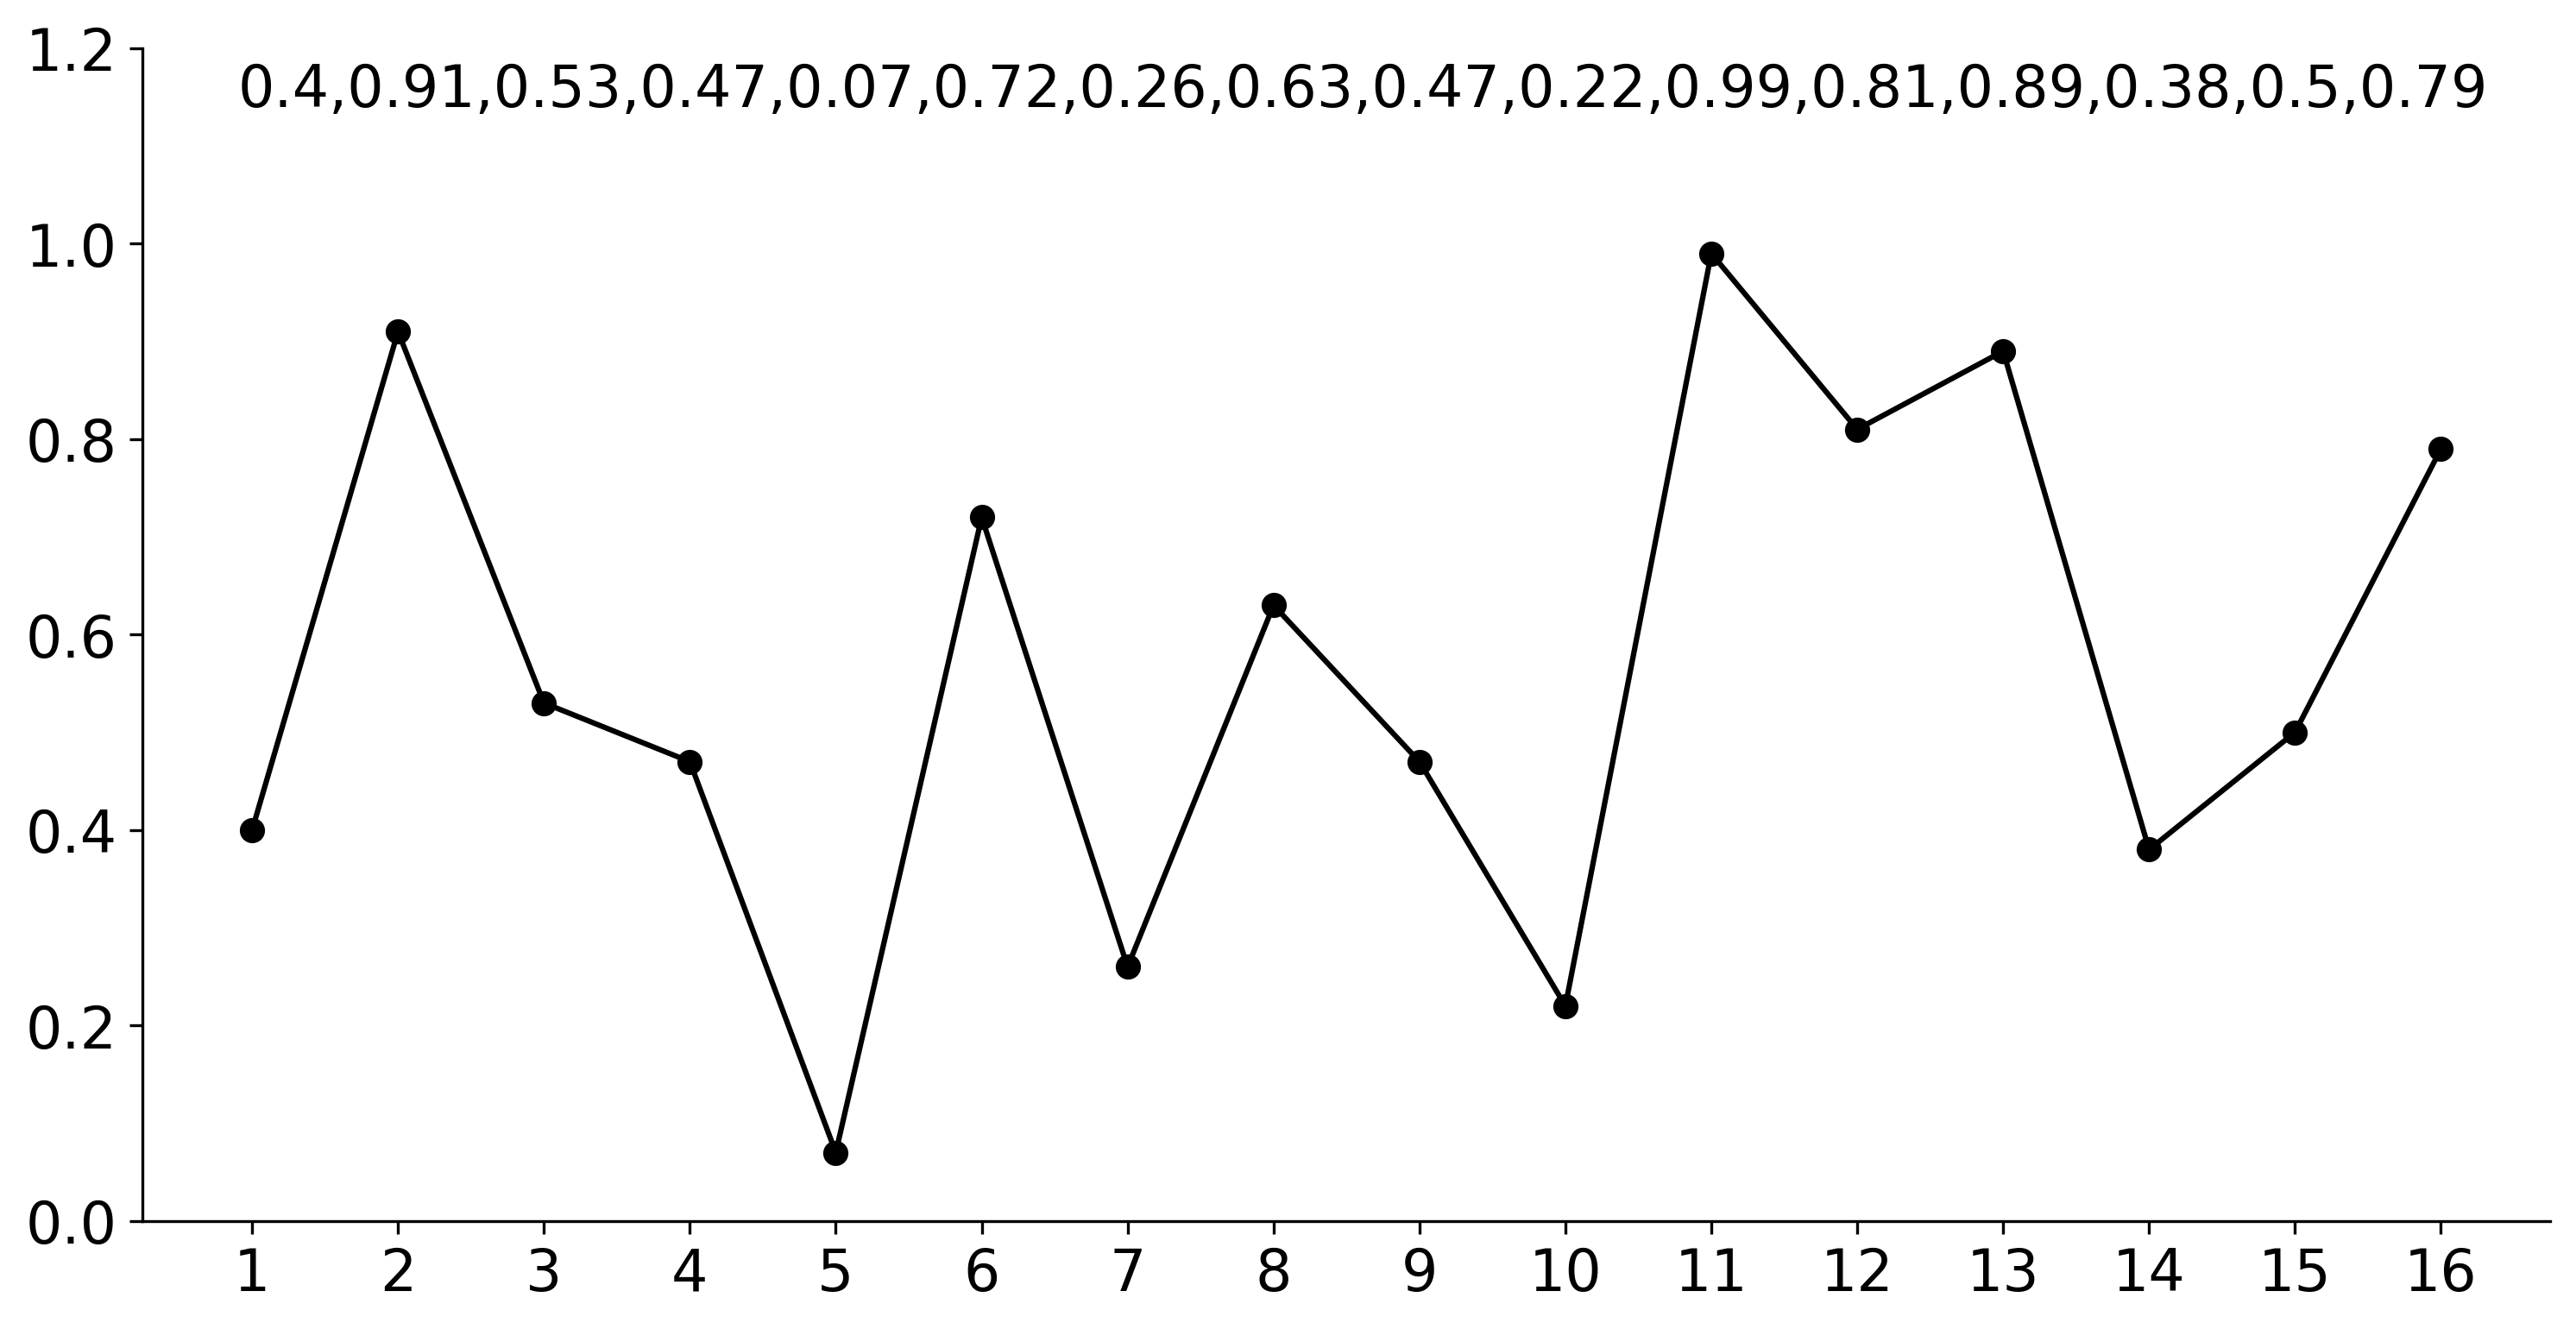

In [3]:
x=range(0,len(Q))

#准备画布，和一个坐标轴 
fig = plt.figure(figsize=(12, 6), dpi=300)#设置图形大小 
ax = fig.add_subplot(111)

#将绘图区对象添加到画布中 fig.add_axes(ax)

#设置样式 
#ax.set_yticks([])
#不显示y坐标轴标签 
plt.text(-0.1, 1.14,'0.4,0.91,0.53,0.47,0.07,0.72,0.26,0.63,0.47,0.22,0.99,0.81,0.89,0.38,0.5,0.79', size=16) 
plt.ylim(0,1.2) 
plt.tick_params(labelsize=18) 
plt.xticks(x,range(1, len(Q) + 1),fontsize=16)
plt.yticks(fontsize=16)
ax.spines['top'].set_visible(False)#不显示上边框 
ax.spines['right'].set_visible(False)#不显示右边框

plt.rcParams['xtick.direction'] = 'in' #将x轴的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in' #将y轴的刻度方向设置向内

plt.plot(x,Q,marker='o',c='black')

#保存图片 
#plt.savefig('E:\\MBVG_line.png',bbox_inches="tight",dpi=600)


In [4]:
#输入一般的序列Q，将其转化成二进制序列P
def Markov(Q):
    #初始化
    P=[]
    
    for i in range(0,len(Q)):
        if not i==len(Q)-1:
            if Q[i+1]-Q[i]>0:
                P.append(1)
            else:
                P.append(0)
                
    #返回
    return np.array(P)

In [5]:
#getBVGPoint函数：输入一般的序列P，将其转化成二进制序列Q，返回BVG图中需要连接的两点坐标的集合
def getBVGPoint(Q):
    
    #坐标
    x=np.array(range(1,len(Q)+1))
    y=np.array(Q)

    #准备序列a,b，将相连的两点的x坐标分别记录在a,b序列中
    a=[]
    b=[]

    #遍历,获得连接两点的横坐标
    #控制ta移动
    for ta in range(0,len(x)-1):
        #控制tb移动
        for tb in range(ta+1,len(x)):
            ta=ta
            ya=y[ta]
            tb=tb
            yb=y[tb]
            #tc在ta,tb之间
            tc=np.array(range(ta+1,tb))
            yc=y[(ta+1):tb]
            #如果相邻，或者(i,j间的yc都为0且ya+yb>yc)，则记录下来
            #并打印相连的两点的坐标用(ta,tb)表示
            if tb-ta==1 or (np.array(yc).any()==0 and ya+yb>np.array(yc).any()):
                a.append(ta)
                b.append(tb)
                #print('(',ta,',',tb,')')
    arr=[a,b]
    return arr



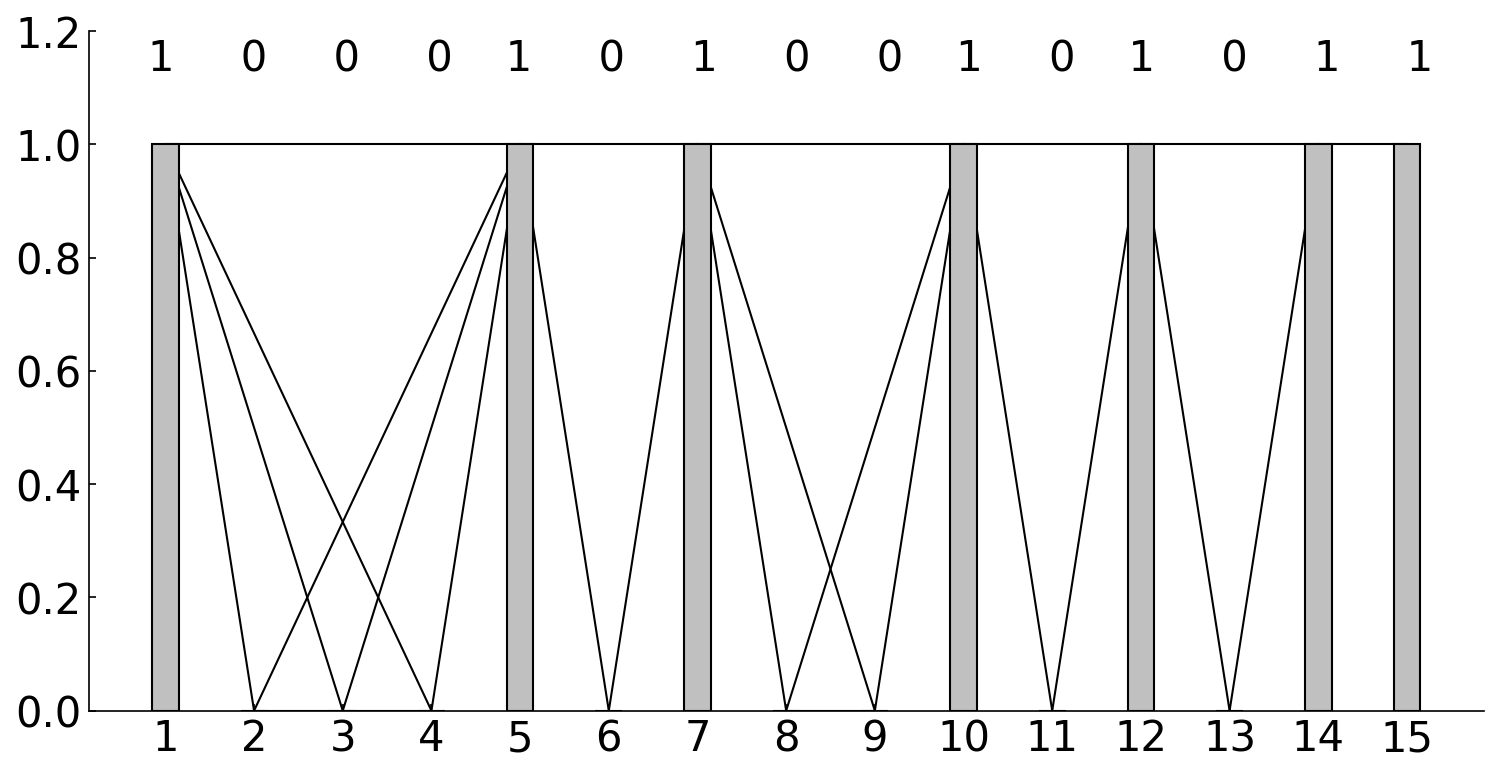

In [6]:
#VG_bar函数：输入序列Q，输出VG条形图（需先调用getVGPoint函数）
def BVG_bar(Q):
    #准备画布，和一个坐标轴
    fig = plt.figure(figsize=(12, 6), dpi=150)#设置图形大小
    ax = fig.add_subplot(111)
    
    #设置样式
    #ax.set_yticks([])#不显示y坐标轴标签
    plt.ylim(0,1.2)
    plt.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)#不显示上边框
    ax.spines['right'].set_visible(False)#不显示右边框
    
    #画条形图
    x= np.array(range(0,len(Q)))
    p1=ax.bar(x,Q,width=0.3,color='#C0C0C0',edgecolor='black',zorder=10)

    #获取要连接两点的坐标
    arr=getBVGPoint(Q)

    #在图中连接两点
    for i in range(0,len(arr[0])):
        p2=ax.plot([arr[0][i],arr[1][i]],[Q[arr[0][i]],Q[arr[1][i]]],color='black',linewidth=1,zorder=0)
    
    #设置x轴刻度的值（为直方条高度），调整字体大小
    plt.xticks(x,range(1, len(Q) + 1),fontsize=20)
    plt.yticks(fontsize=20)
    
    
    plt.text(-0.2, 1.13, '1     0     0     0    1     0     1     0     0    1     0    1     0     1     1', size=20)
    #显示图像
    plt.rcParams['xtick.direction'] = 'in' #将x轴的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in' #将y轴的刻度方向设置向内
    
    #保存图片
    #plt.savefig('E:\\MBVG_bar.png',bbox_inches="tight",dpi=600)
    
    #显示图像
    plt.show()
    
#调用
BVG_bar(Markov(Q))

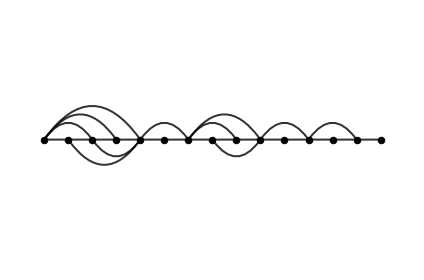

In [7]:
# %matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

def BVG_net(Q):
    arr=getBVGPoint(Q)
    x=np.array(range(0,len(Q)))
    G = nx.Graph()        # 无多重边有向图

    #点
    G.add_nodes_from(x)  # 添加多个节点

    #边
    for i in range(0,len(arr[0])):
        if arr[1][i]-arr[0][i]==1:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0)
        else:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0.7)

    #位置
    pos=dict()
    for i in range(len(Q),-1,-1):
        sd={i:(i,0)}
        pos={**sd,**pos}
    #画点
    nx.draw_networkx_nodes(G, pos, node_size=42, nodelist=x, node_color="black")

    ax = plt.gca()

    #画边
    edge1=[[],[]]#存储边
    for edge in G.edges(data=True):
        edge1[0].append(edge[0])
        edge1[1].append(edge[1])
        
        if edge[2]["rad"]==0:
            arrowprops=dict(arrowstyle="-",color='black',connectionstyle=f'arc3, rad = -{edge[2]["rad"]}',linewidth=2,linestyle= '-',alpha=0.8,)
            ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
        else:
            for i in range(len(edge1[0])):
                #判断边是否与前面某条边有交叉，如果有就在下边画
                panduan=edge[0]>edge1[0][i] and edge[0]<edge1[1][i] and edge[1]>edge1[1][i]
                if panduan:
                    arrowprops=dict(arrowstyle="-",color='black',connectionstyle=f'arc3, rad = -{edge[2]["rad"]}',linewidth=2,linestyle= '-',alpha=0.8,)
                    ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
                    break
            #如果没有就在上边画
            if i==len(edge1[0])-1 and not panduan:
                arrowprops=dict(arrowstyle="-",color='black',connectionstyle=f'arc3, rad = {edge[2]["rad"]}',linewidth=2,linestyle= '-',alpha=0.8,)
                ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
    
    
    ax.margins(0.11)
    plt.tight_layout()
    plt.axis("off")
    #plt.savefig('E:\\MBVG_net.png',dpi=600)
    plt.show()

BVG_net(Markov(Q))